In [46]:
from sklearn import tree


# Read the CSV and Perform Basic Data Cleaning

In [3]:
df = pd.read_csv("exoplanet_data.csv")
#Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0.0,1.0,0.0,0.0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0.0,0.0,0.0,0.0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0.0,0.0,0.0,0.0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0.0,0.0,0.0,1.0,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0.0,1.0,1.0,0.0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0.0,0.0,0.0,0.0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0.0,0.0,1.0,0.0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Select your features (columns)

In [10]:
# Assign data to X 
# Sklearn requieres two dimensional array values
# So we use reshape to crete it
# Set features. This will also be used as your x values.
X = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration']]
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration
0,0.0,0.0,0.0,0.0,54.418383,162.513840,0.586,4.50700
1,0.0,1.0,0.0,0.0,19.899140,175.850252,0.969,1.78220
2,0.0,1.0,0.0,0.0,1.736952,170.307565,1.276,2.40641
3,0.0,0.0,0.0,0.0,2.525592,171.595550,0.701,1.65450
4,0.0,0.0,0.0,0.0,4.134435,172.979370,0.762,3.14020
...,...,...,...,...,...,...,...,...
6986,0.0,0.0,0.0,1.0,8.589871,132.016100,0.765,4.80600
6987,0.0,1.0,1.0,0.0,0.527699,131.705093,1.252,3.22210
6988,0.0,0.0,0.0,0.0,1.739849,133.001270,0.043,3.11400
6989,0.0,0.0,1.0,0.0,0.681402,132.181750,0.147,0.86500



# Defining the Target

In [12]:
y = df["koi_disposition"]
y

0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object

# Create the tree

Use `koi_disposition` for the y values

In [72]:
planets_tree = tree.DecisionTreeClassifier()
planets_tree = planets_tree.fit(X, y)
planets_tree.score(X, y)
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration
0,0.0,0.0,0.0,0.0,54.418383,162.513840,0.586,4.50700
1,0.0,1.0,0.0,0.0,19.899140,175.850252,0.969,1.78220
2,0.0,1.0,0.0,0.0,1.736952,170.307565,1.276,2.40641
3,0.0,0.0,0.0,0.0,2.525592,171.595550,0.701,1.65450
4,0.0,0.0,0.0,0.0,4.134435,172.979370,0.762,3.14020
...,...,...,...,...,...,...,...,...
6986,0.0,0.0,0.0,1.0,8.589871,132.016100,0.765,4.80600
6987,0.0,1.0,1.0,0.0,0.527699,131.705093,1.252,3.22210
6988,0.0,0.0,0.0,0.0,1.739849,133.001270,0.043,3.11400
6989,0.0,0.0,1.0,0.0,0.681402,132.181750,0.147,0.86500


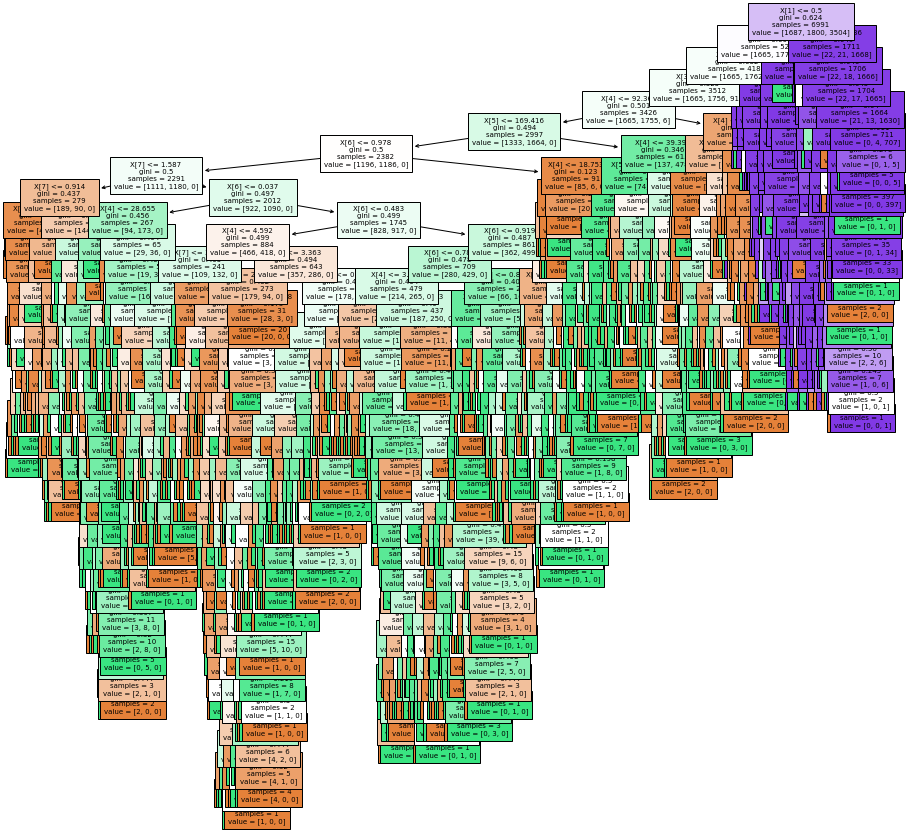

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
tree.plot_tree(planets_tree, fontsize=7, filled = True)
plt.show()

# The most important variable is X[1] = koi_fpflag_nt: A KOI whose light curve is not consistent with that of a transiting planet. This includes, but is not limited to, instrumental artifacts, non-eclipsing variable stars, and spurious (very low SNR) detections.